Unsupervised learning menggunakan metode K-Mean Clustering untuk segmentasi pelanggan

import library

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

membaca data

In [2]:
data = pd.read_csv('customers.csv', usecols=["gender","age","income","spending_score","profession","work_experience","family_size"])

Preprocessing data

In [3]:

# Encode kolom kategorikal
le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])

le_profession = LabelEncoder()
data['profession'] = le_profession.fit_transform(data['profession'])

# Ambil fitur yang relevan untuk clustering
features = ['gender', 'age', 'income', 'spending_score', 'profession', 'work_experience', 'family_size']
X = data[features]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Menentukan Jumlah Cluster menggunakan elbow method

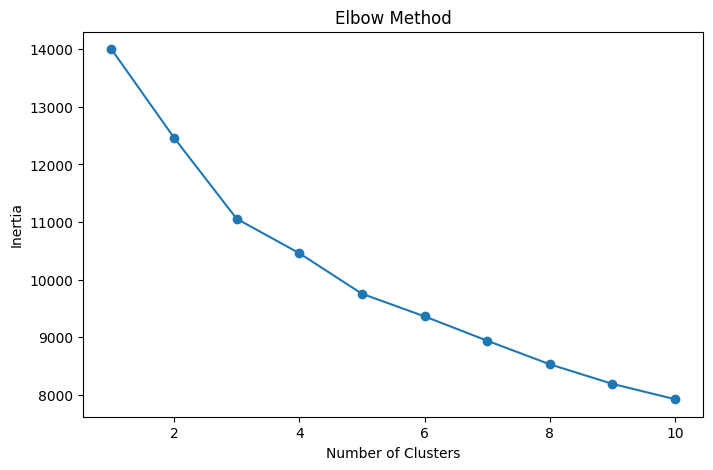

In [4]:
inertia = []
k_range = range(1, 11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Melakukan K-Means clustering berdasarkan hasil elbow method

In [5]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['cluster'] = clusters

Visualisasi hasil

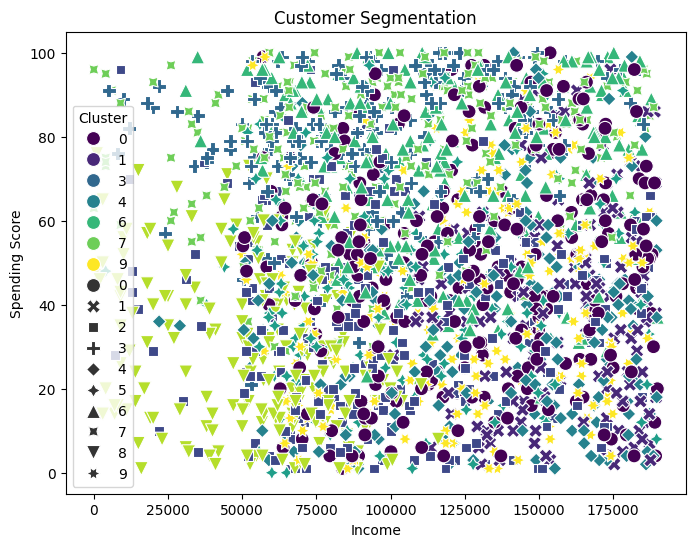

In [6]:
# Visualisasi cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
  x=data['income'], 
  y=data['spending_score'], 
  hue=data['cluster'], 
  palette='viridis', 
  style=data['cluster'], 
  s=100
)
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


Analisa Hasil

In [7]:
print(data.groupby('cluster').mean())

           gender        age         income  spending_score  profession  \
cluster                                                                   
0        1.000000  78.231076  128878.482072       48.227092    2.067729   
1        0.123188  33.326087  157058.898551       37.456522    1.695652   
2        1.000000  47.860262   99467.497817       36.052402    4.925764   
3        0.000000  23.191489   94653.760638       80.047872    3.159574   
4        0.222772  27.846535  132574.980198       38.287129    3.495050   
5        0.019108  63.350318  105372.356688       43.171975    1.000000   
6        0.000000  78.206030  120560.150754       72.929648    1.924623   
7        1.000000  27.975610  100205.016260       75.317073    2.288618   
8        0.106280  44.859903   55550.038647       29.980676    1.975845   
9        0.005464  60.453552  127888.983607       41.459016    6.469945   

         work_experience  family_size  
cluster                                
0               4.4


### Kolom Penjelasan:
- **`gender`**: Nilai mendekati 1 menunjukkan mayoritas pria, sedangkan mendekati 0 menunjukkan mayoritas wanita.
- **`age`**: Rata-rata usia di klaster tersebut.
- **`income`**: Rata-rata pendapatan pelanggan di klaster tersebut.
- **`spending_score`**: Skor pengeluaran, mencerminkan kebiasaan berbelanja pelanggan (rendah hingga tinggi).
- **`profession`**: Profesi yang dikelompokkan (kode kategorikal yang di-encode).
- **`work_experience`**: Rata-rata pengalaman kerja dalam tahun.
- **`family_size`**: Rata-rata ukuran keluarga.

---

### **Analisis Klaster**
Berikut deskripsi potensi dari masing-masing klaster:

#### **Cluster 0**:
- Mayoritas pria (gender = 1).
- Rata-rata usia **78 tahun** dengan pendapatan tinggi (**128,878**) dan skor pengeluaran rendah (**48**).
- Pengalaman kerja cukup lama (**4.49 tahun**), dengan ukuran keluarga sedang (**3.45**).
- **Potensi interpretasi**: Kelompok lansia dengan pendapatan tinggi namun pengeluaran rendah. Mereka mungkin lebih fokus pada tabungan atau pengeluaran untuk kebutuhan esensial.

#### **Cluster 1**:
- Mayoritas wanita (gender ≈ 0.12).
- Usia muda (**33 tahun**) dengan pendapatan tertinggi (**157,058**) tetapi skor pengeluaran rendah (**37**).
- Pengalaman kerja masih sedikit (**1.55 tahun**) dan ukuran keluarga kecil (**2.26**).
- **Potensi interpretasi**: Profesional muda dengan pendapatan tinggi, namun cenderung berbelanja hemat. Mereka mungkin memprioritaskan karier atau investasi jangka panjang.

#### **Cluster 2**:
- Mayoritas pria (gender ≈ 1).
- Usia paruh baya (**47 tahun**) dengan pendapatan menengah (**99,467**) dan skor pengeluaran rendah (**36**).
- Pengalaman kerja sedang (**2.8 tahun**) dan ukuran keluarga besar (**5.14**).
- **Potensi interpretasi**: Kelompok keluarga dengan tanggungan lebih besar, berpendapatan menengah, dan cenderung hemat karena alokasi keperluan keluarga.

#### **Cluster 3**:
- Mayoritas wanita (gender ≈ 0).
- Usia sangat muda (**23 tahun**) dengan pendapatan rendah (**94,653**) namun skor pengeluaran sangat tinggi (**80**).
- Pengalaman kerja sangat minim (**2.58 tahun**) dan ukuran keluarga sedang (**3.98**).
- **Potensi interpretasi**: Mahasiswa atau profesional muda dengan pendapatan kecil tetapi gaya hidup boros. Mereka mungkin fokus pada pengeluaran non-esensial seperti hiburan.

#### **Cluster 4**:
- Mayoritas wanita (gender ≈ 0.22).
- Usia muda (**27 tahun**) dengan pendapatan cukup tinggi (**132,574**) dan skor pengeluaran sedang (**38**).
- Pengalaman kerja cukup panjang (**10 tahun**) dan ukuran keluarga sedang (**3.9**).
- **Potensi interpretasi**: Profesional muda dengan pengeluaran konservatif. Mereka mungkin menyeimbangkan pengeluaran dengan tanggung jawab keluarga.

#### **Cluster 5**:
- Mayoritas wanita (gender ≈ 0.01).
- Usia paruh baya (**63 tahun**) dengan pendapatan menengah (**105,372**) dan skor pengeluaran sedang (**43**).
- Pengalaman kerja cukup lama (**3.35 tahun**) dan ukuran keluarga besar (**6.26**).
- **Potensi interpretasi**: Lansia dengan tanggungan keluarga besar dan pola belanja menengah. Fokus mereka mungkin pada kebutuhan rumah tangga.

#### **Cluster 6**:
- Mayoritas pria (gender = 1).
- Usia tua (**78 tahun**) dengan pendapatan tinggi (**120,560**) dan skor pengeluaran sangat tinggi (**72**).
- Pengalaman kerja lama (**5.09 tahun**) dan ukuran keluarga kecil (**2.93**).
- **Potensi interpretasi**: Lansia dengan gaya hidup aktif, pengeluaran tinggi, dan fokus pada kebutuhan pribadi atau rekreasi.

#### **Cluster 7**:
- Mayoritas pria (gender = 1).
- Usia sangat muda (**27 tahun**) dengan pendapatan menengah (**100,205**) dan skor pengeluaran tinggi (**75**).
- Pengalaman kerja rendah (**4.24 tahun**) dan ukuran keluarga kecil (**3.18**).
- **Potensi interpretasi**: Profesional muda dengan gaya hidup konsumtif. Mereka mungkin target ideal untuk produk gaya hidup atau hiburan.

#### **Cluster 8**:
- Mayoritas wanita (gender ≈ 0.10).
- Usia paruh baya (**44 tahun**) dengan pendapatan sangat rendah (**55,550**) dan skor pengeluaran sangat rendah (**29**).
- Pengalaman kerja sedang (**2.9 tahun**) dan ukuran keluarga kecil (**2.26**).
- **Potensi interpretasi**: Kelompok ekonomi lemah dengan pengeluaran sangat hemat. Fokus mereka mungkin pada kebutuhan esensial.

#### **Cluster 9**:
- Mayoritas wanita (gender ≈ 0.005).
- Usia tua (**60 tahun**) dengan pendapatan tinggi (**127,888**) dan skor pengeluaran sedang (**41**).
- Pengalaman kerja cukup panjang (**6.46 tahun**) dan ukuran keluarga besar (**4.48**).
- **Potensi interpretasi**: Lansia dengan tanggungan keluarga yang lebih besar, fokus pada kebutuhan rumah tangga.

---

### Rekomendasi Tindak Lanjut:
1. **Target Pemasaran**:
   - **Cluster 3 dan 7**: Fokus pada produk gaya hidup, hiburan, atau fashion untuk pelanggan muda yang konsumtif.
   - **Cluster 0, 5, dan 9**: Produk kesehatan, asuransi, atau kebutuhan keluarga untuk kelompok lansia atau keluarga besar.
   - **Cluster 1 dan 4**: Layanan investasi atau tabungan untuk profesional muda yang hemat.

2. **Segmentasi Lebih Lanjut**:
   - Gunakan analisis tambahan untuk mengidentifikasi faktor yang memengaruhi spending score, seperti produk tertentu atau pengaruh demografis lainnya.